In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

from keras import Sequential

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import tree
from colorama import Fore  #Colorama is a module to color the python outputs
from urllib.parse import urlparse

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

# 現在我們可以建立我們的模型。我們將使用一個簡單的LSTM模型。
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

2024-04-07 14:45:06.049718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simhoz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('train_dataset.csv')
df.head(10)

,uid,website_links,anchor_url,request_url,email_submission,different_href_urls,right_click_disabled,popup_window_text_fields,iframe_redirection,favicon_external_domain,result
0,2000000000002925,1,1,1,1,-1,1,1,1,1,1
1,2000000000017433,1,1,1,1,-1,1,1,1,1,1
2,1613574528692723,1,1,0,1,-1,1,1,1,1,-1
3,1626621687765396,1,1,0,1,-1,1,1,1,1,-1
4,1613575926624924,1,1,0,1,-1,1,1,1,1,-1
5,2000000000006366,1,1,1,1,-1,1,1,1,1,1
6,1635704881469754,1,1,0,1,-1,1,1,1,1,-1
7,1635707621434936,1,1,0,1,-1,1,1,1,1,-1
8,1613575685829249,1,1,0,1,-1,1,1,1,1,-1
9,1613567605964981,1,1,0,1,-1,1,1,1,1,-1


In [3]:
df.columns

Index(['uid', 'website_links', 'anchor_url', 'request_url', 'email_submission',
       'different_href_urls', 'right_click_disabled',
       'popup_window_text_fields', 'iframe_redirection',
       'favicon_external_domain', 'result'],
      dtype='object')

In [4]:
feature = ['website_links', 'anchor_url', 'request_url', 'email_submission',
       'different_href_urls', 'right_click_disabled',
       'popup_window_text_fields', 'iframe_redirection',
       'favicon_external_domain', 'result']

def positive_number(num):
    if num == 1:
        return 1
    else:
        return 0
    
for a in feature:
    df[a] = df[a].apply(lambda x: positive_number(x))
    
df.head(20)

,uid,website_links,anchor_url,request_url,email_submission,different_href_urls,right_click_disabled,popup_window_text_fields,iframe_redirection,favicon_external_domain,result
0,2000000000002925,1,1,1,1,0,1,1,1,1,1
1,2000000000017433,1,1,1,1,0,1,1,1,1,1
2,1613574528692723,1,1,0,1,0,1,1,1,1,0
3,1626621687765396,1,1,0,1,0,1,1,1,1,0
4,1613575926624924,1,1,0,1,0,1,1,1,1,0
5,2000000000006366,1,1,1,1,0,1,1,1,1,1
6,1635704881469754,1,1,0,1,0,1,1,1,1,0
7,1635707621434936,1,1,0,1,0,1,1,1,1,0
8,1613575685829249,1,1,0,1,0,1,1,1,1,0
9,1613567605964981,1,1,0,1,0,1,1,1,1,0


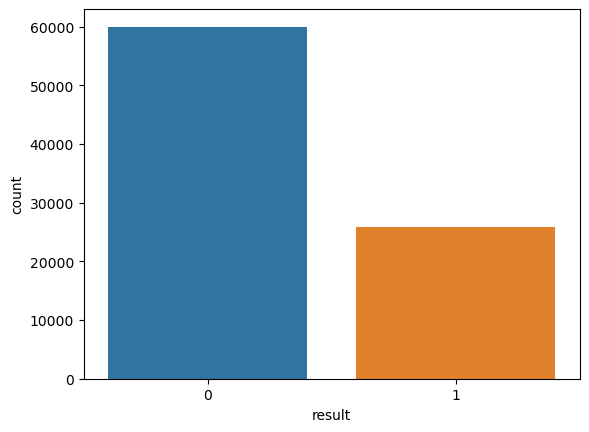

In [5]:
sns.countplot(x='result', data=df);

In [6]:
count_pos = df[df['result'] == 1].shape[0]
count_pos

25921

In [8]:
count_neg = df[df['result'] == 0].shape[0]
count_neg

60000

<AxesSubplot:>

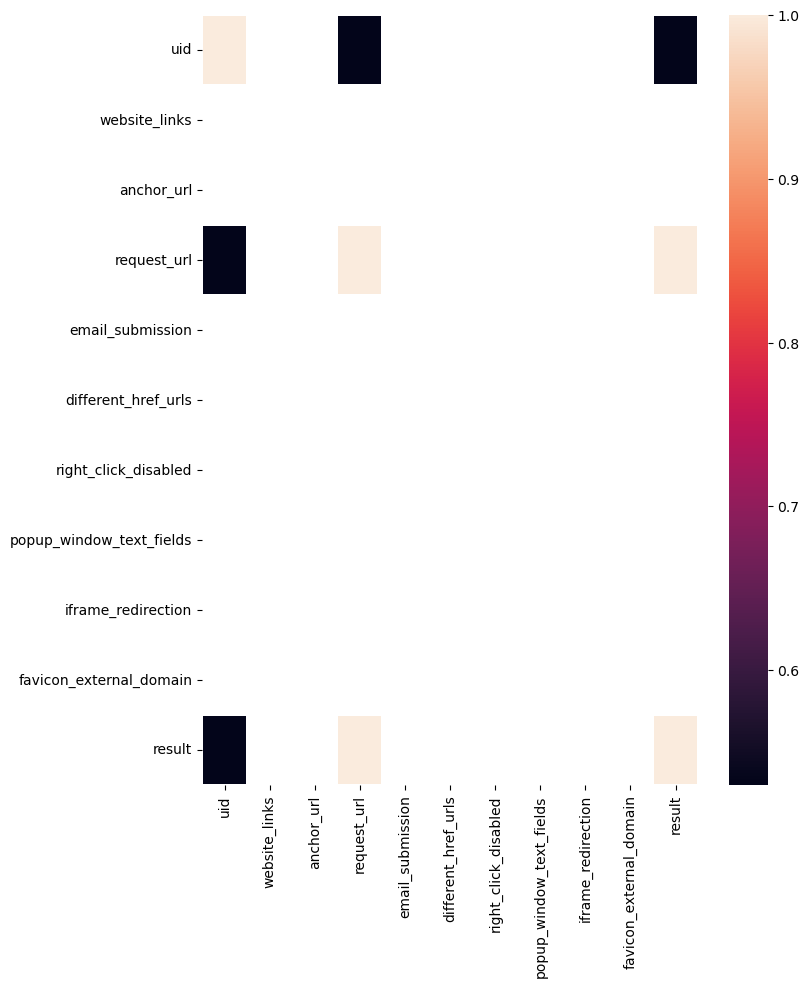

In [15]:
plt.figure(figsize=(8, 10))
sns.heatmap(df.corr(), linewidths=.1)

In [16]:
Y1 = df['result']
X1 = df.drop(columns = ['uid','result'])

In [52]:
Y1

0        1
1        1
2        0
3        0
4        0
        ..
85916    0
85917    0
85918    0
85919    0
85920    0
Name: result, Length: 85921, dtype: int64

In [17]:
X1.head(2)

,website_links,anchor_url,request_url,email_submission,different_href_urls,right_click_disabled,popup_window_text_fields,iframe_redirection,favicon_external_domain
0,1,1,1,1,0,1,1,1,1
1,1,1,1,1,0,1,1,1,1


In [53]:
Y1.head(24)

0     1
1     1
2     0
3     0
4     0
5     1
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    1
14    0
15    0
16    0
17    0
18    0
19    0
20    1
21    1
22    1
23    0
Name: result, dtype: int64

In [19]:
#data for learning without features 

X2 = df['uid']
X2.head(2)

0    2000000000002925
1    2000000000017433
Name: uid, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [21]:
X_train1 = np.expand_dims(X_train1, axis=-1)
X_test1 = np.expand_dims(X_test1, axis=-1)

X_train1.shape

(68736, 9, 1)

In [22]:
input_size1 = X_train1[1].shape
input_size1

(9, 1)

In [23]:
# Evaluation Helper Functions
def eval_graph(results):

    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    epochs = range(len(acc))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,acc,'r',label="Training Accuracy")
    plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()
    
    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(loss))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,loss,'r',label="Training loss")
    plt.plot(epochs,val_loss,'b',label="Validation loss")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH")
    plt.show()

In [24]:
def conf_matrix(X_test,Y_test,model):
    
    Y_pred = model.predict(X_test)
    Y_pred = Y_pred>0.5
    cm = confusion_matrix(Y_test,Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap = plt.cm.YlGn)
    plt.title('CONFUSION MATRIX')
    plt.show()

In [25]:
# CNN MODEL
def CNN(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_model1 = CNN(input_size1)
CNN_model1.summary()

2024-03-08 23:54:29.415778: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 16)             64        
                                                                 
 dropout (Dropout)           (None, 9, 16)             0         
                                                                 
 batch_normalization (BatchN  (None, 9, 16)            64        
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 16)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 32)             1568      
                                                                 
 dropout_1 (Dropout)         (None, 5, 32)             0

In [26]:
# CNN MODEL ON FIRST DATASET
CNN_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_1 = CNN_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
430/430 [==============================] - ETA: 0s - loss: 0.0351 - accuracy: 0.9847
Epoch 1: val_loss improved from inf to 0.00003, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 9s 16ms/step - loss: 0.0351 - accuracy: 0.9847 - val_loss: 2.8402e-05 - val_accuracy: 1.0000
Epoch 2/200
426/430 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9994
Epoch 2: val_loss improved from 0.00003 to 0.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 6s 14ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 2.5787e-06 - val_accuracy: 1.0000
Epoch 3/200
428/430 [============================>.] - ETA: 0s - loss: 6.9139e-04 - accuracy: 0.9998
Epoch 3: val_loss improved from 0.00000 to 0.00000, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 6s 15ms/step - loss: 6.8885e-04 - accuracy: 0.9998 - val_loss: 4.0399e-07 - val_accuracy

In [27]:
CNN_model1.evaluate(X_test1,Y_test1,verbose = 1)

538/538 [==============================] - 3s 5ms/step - loss: 4.8587e-11 - accuracy: 1.0000


[4.858658614326217e-11, 1.0]

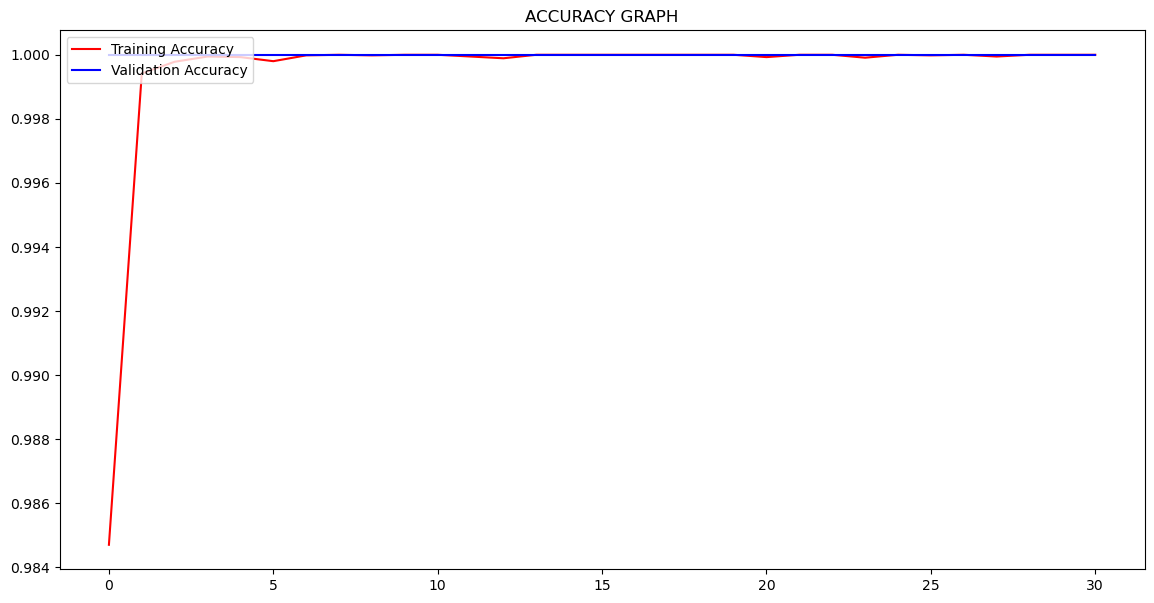

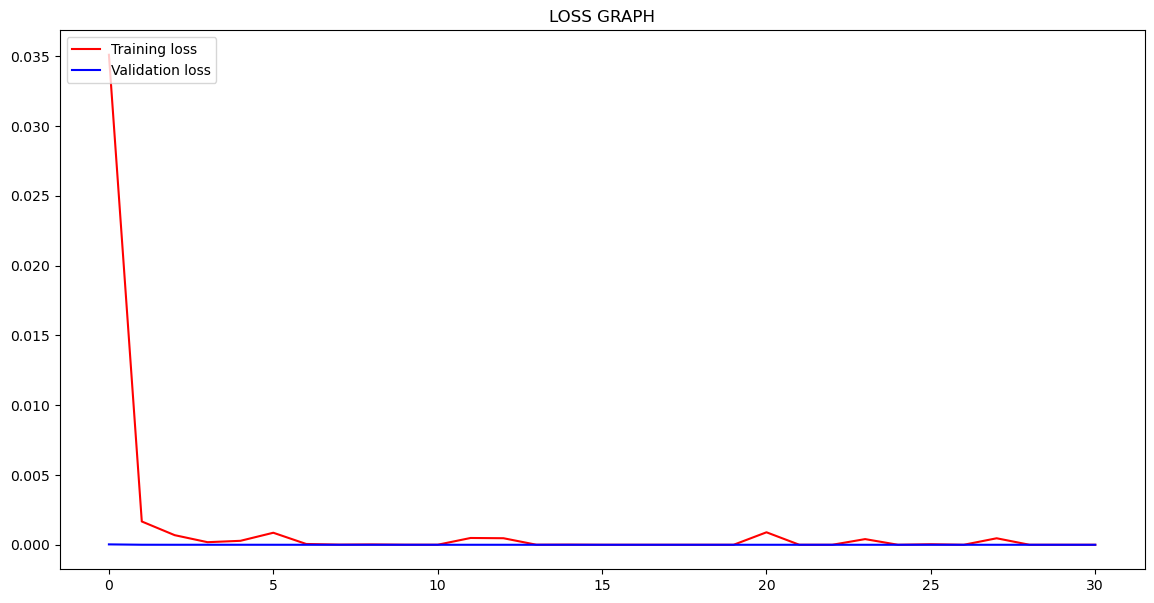

In [28]:
eval_graph(CNN_results_1)

In [55]:
X_test1[0]

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [29]:
Y_test1

60602    0
50844    0
47479    1
17790    0
76139    1
        ..
76924    1
14846    1
79072    0
12569    0
70988    1
Name: result, Length: 17185, dtype: int64

538/538 [==============================] - 3s 4ms/step


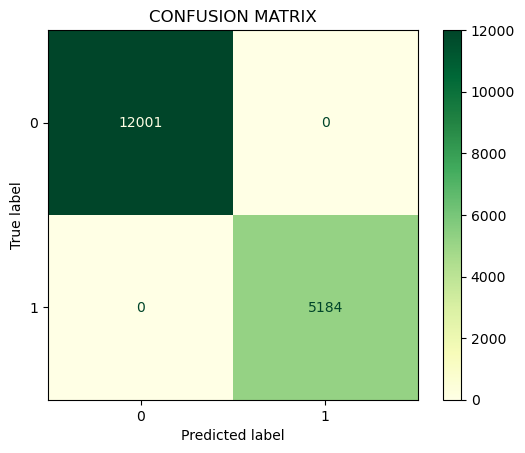

In [30]:
conf_matrix(X_test1,Y_test1,CNN_model1)

In [36]:
x_train_2D = (X_train1.reshape(X_train1.shape[0], X_train1.shape[1] * X_train1.shape[2]))
x_test_2D = (X_train1.reshape(X_train1.shape[0], X_train1.shape[1] * X_train1.shape[2]))


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train_2D)
X_test_scaled = scaler.transform(x_test_2D)

In [38]:
y_pred = CNN_model1.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test1, y_pred_classes)

# Classification Report
class_report = classification_report(Y_test1, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

2148/2148 [==============================] - 5s 2ms/step


ValueError: Found input variables with inconsistent numbers of samples: [17185, 68736]

In [33]:
# CNN LSTM MODEL
def CNN_LSTM(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.LSTM(128,return_sequences=True))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_LSTM_model1 = CNN_LSTM(input_size1)
CNN_LSTM_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 9, 16)             64        
                                                                 
 dropout_7 (Dropout)         (None, 9, 16)             0         
                                                                 
 batch_normalization_5 (Batc  (None, 9, 16)            64        
 hNormalization)                                                 
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 5, 16)            0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 5, 32)             1568      
                                                                 
 dropout_8 (Dropout)         (None, 5, 32)            

In [34]:
# CNN_LSTM MODEL ON FIRST DATASET
CNN_LSTM_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_1 = CNN_LSTM_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
428/430 [============================>.] - ETA: 0s - loss: 0.0351 - accuracy: 0.9834
Epoch 1: val_loss improved from inf to 0.00124, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 16s 27ms/step - loss: 0.0350 - accuracy: 0.9834 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 2/200
428/430 [============================>.] - ETA: 0s - loss: 3.7127e-04 - accuracy: 0.9999
Epoch 2: val_loss improved from 0.00124 to 0.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 12s 28ms/step - loss: 3.6992e-04 - accuracy: 0.9999 - val_loss: 3.5200e-07 - val_accuracy: 1.0000
Epoch 3/200
429/430 [============================>.] - ETA: 0s - loss: 6.2607e-04 - accuracy: 0.9999
Epoch 3: val_loss improved from 0.00000 to 0.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 10s 24ms/step - loss: 6.2524e-04 - accuracy: 0.9999 - val_loss: 1.3

Epoch 26/200
430/430 [==============================] - ETA: 0s - loss: 7.4221e-06 - accuracy: 1.0000
Epoch 26: val_loss did not improve from 0.00000
430/430 [==============================] - 11s 25ms/step - loss: 7.4221e-06 - accuracy: 1.0000 - val_loss: 8.9840e-12 - val_accuracy: 1.0000
Epoch 27/200
429/430 [============================>.] - ETA: 0s - loss: 1.8976e-05 - accuracy: 1.0000
Epoch 27: val_loss improved from 0.00000 to 0.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 12s 29ms/step - loss: 1.8950e-05 - accuracy: 1.0000 - val_loss: 3.8627e-13 - val_accuracy: 1.0000
Epoch 28/200
428/430 [============================>.] - ETA: 0s - loss: 2.3037e-07 - accuracy: 1.0000
Epoch 28: val_loss improved from 0.00000 to 0.00000, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
430/430 [==============================] - 12s 27ms/step - loss: 2.2962e-07 - accuracy: 1.0000 - val_loss: 1.6340e-13 - val_accuracy: 1.0000
Epoch 2

538/538 [==============================] - 2s 4ms/step - loss: 1.7091e-13 - accuracy: 1.0000


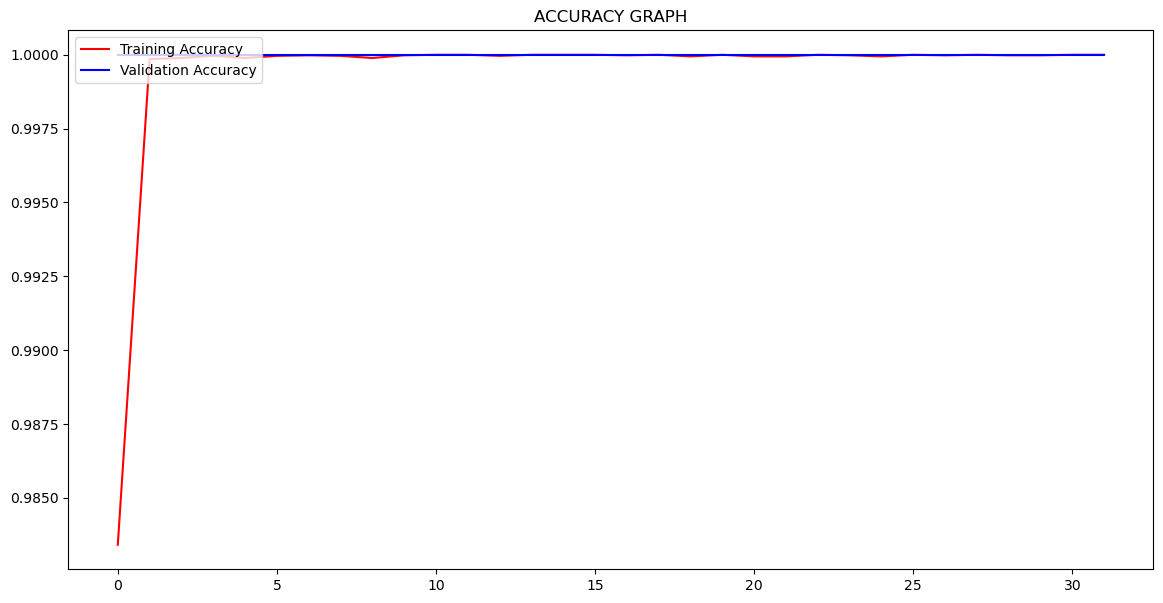

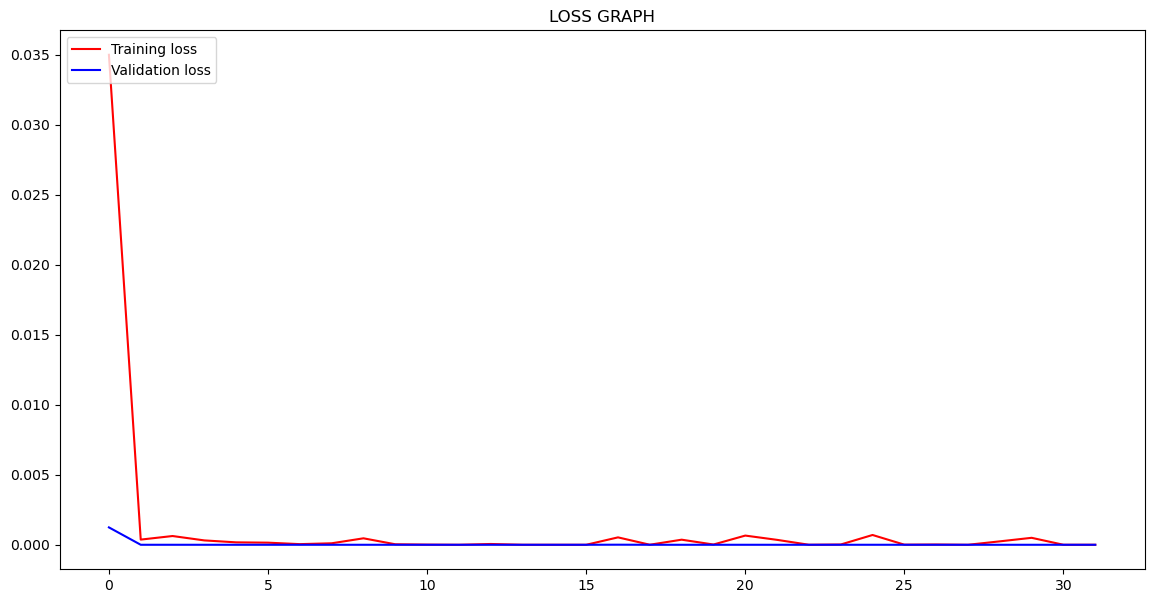

538/538 [==============================] - 3s 4ms/step


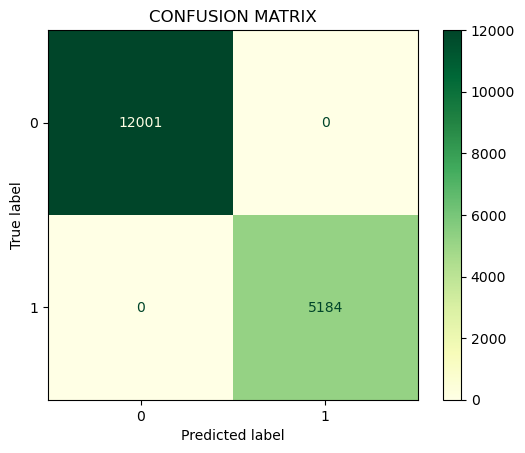

In [35]:
CNN_LSTM_model1.evaluate(X_test1,Y_test1)
eval_graph(CNN_LSTM_results_1)
conf_matrix(X_test1,Y_test1,CNN_LSTM_model1)

In [50]:
model_architecture = CNN_LSTM_model1.to_json()
with open('./modal/CNN_LSTM_model_dataset_filter_1_and_0.json', 'w') as json_file:
    json_file.write(model_architecture)

In [51]:
model_architecture = CNN_model1.to_json()
with open('./modal/CNN_model_dataset_filter_1_and_0.json', 'w') as json_file:
    json_file.write(model_architecture)

In [56]:
model_architecture = CNN_LSTM_model1.to_json()
with open('./modal/CNN_LSTM_contentv2_0.json', 'w') as json_file:
    json_file.write(model_architecture)

In [57]:
model_architecture = CNN_model1.to_json()
with open('./modal/CNN_contentv2_0.json', 'w') as json_file:
    json_file.write(model_architecture)